<a href="https://colab.research.google.com/github/MianUsmanAhmed12/Lab4/blob/main/my_recomender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [ ]:
# reading csv and giving the columns names
data  = pd.read_csv('jester-data-1.csv')
data.rename(columns={0:'num of ratings'},inplace=True)
data

,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,...,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24980,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [ ]:
#deleting column which does not have rating
#del data['num of ratings']
data = data.drop(columns=data.columns[0])
data

,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,...,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24980,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [ ]:
#preparing for test set
test_df=data


In [ ]:
#preparing for validation test

arr = data.values

In [ ]:
#using helper function to replace 10% non null values with 99
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [ ]:
new_arr, validation_indices = replace(arr, 0.1)

In [ ]:
n_latent_factors = 2

user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [ ]:
latent_item_features

array([[0.428, 0.224],
       [0.83 , 0.535],
       [0.18 , 0.63 ],
       [0.669, 0.6  ],
       [0.818, 0.325],
       [0.375, 0.345],
       [0.777, 0.749],
       [0.182, 0.189],
       [0.937, 0.435],
       [0.462, 0.48 ],
       [0.429, 0.827],
       [0.559, 0.888],
       [0.953, 0.844],
       [0.598, 0.291],
       [0.483, 0.247],
       [0.274, 0.712],
       [0.806, 0.679],
       [0.638, 0.016],
       [0.379, 0.205],
       [0.524, 0.333],
       [0.756, 0.459],
       [0.824, 0.425],
       [0.273, 0.913],
       [0.464, 0.075],
       [0.757, 0.089],
       [0.409, 0.356],
       [0.814, 0.628],
       [0.11 , 0.046],
       [0.138, 0.491],
       [0.974, 0.884],
       [0.721, 0.207],
       [0.233, 0.785],
       [0.747, 0.06 ],
       [0.895, 0.787],
       [0.983, 0.807],
       [0.076, 0.047],
       [0.854, 0.233],
       [0.334, 0.451],
       [0.265, 0.109],
       [0.827, 0.951],
       [0.14 , 0.521],
       [0.25 , 0.923],
       [0.586, 0.695],
       [0.5

In [ ]:
latent_user_preferences

array([[0.339, 0.731],
       [0.788, 0.138],
       [0.857, 0.481],
       ...,
       [0.178, 0.048],
       [0.106, 0.988],
       [0.474, 0.446]])

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                #if rating is not equal to 99 changed this line
                if(rating != 99):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/30:	MSE=21.878974
Iteration 10/30:	MSE=20.443431
Iteration 20/30:	MSE=18.232827


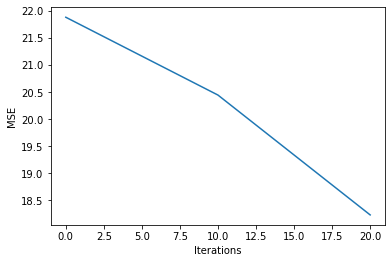

In [ ]:
num_iter = 30
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[ 2.602,  2.827,  3.119, ...,  2.256,  2.788,  2.544],
       [ 6.572,  6.915,  7.164, ...,  6.714,  6.387,  7.625],
       [ 2.842,  2.93 ,  2.905, ...,  3.18 ,  2.585,  3.624],
       ...,
       [-0.22 , -0.267, -0.354, ..., -0.06 , -0.319, -0.061],
       [-1.52 , -1.891, -2.583, ..., -0.23 , -2.327, -0.202],
       [ 2.88 ,  2.87 ,  2.629, ...,  3.67 ,  2.331,  4.201]])

In [ ]:
#comparing the predicted rating with that of original ones
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [ ]:
comparison_data

,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,...,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,"(99.0, 2.602182295013808)","(-0.29, 2.8269930093450766)","(6.36, 3.118838488396229)","(99.0, 3.68361099249608)","(-2.38, 2.0638601966729486)","(-9.66, 2.6489510374038265)","(-0.73, 2.3350452067224468)","(-5.34, 1.6332246202708083)","(8.88, 3.6628440637345934)","(99.0, 2.6695525745535758)",...,"(2.82, 2.0096482893014387)","(-4.95, 2.3035423380438487)","(-0.29, 1.8672250490577598)","(7.86, 2.589033983138518)","(-0.19, 2.2856239487711645)","(-2.14, 2.3138340628271385)","(99.0, 2.146495428747058)","(0.34, 2.255812114105328)","(-4.32, 2.787929368690181)","(99.0, 2.5437264967454074)"
1,"(99.0, 6.571648119951539)","(99.0, 6.915047868350648)","(99.0, 7.1640826457591755)","(99.0, 6.704681842648804)","(99.0, 5.302583173523195)","(9.27, 8.251024736564611)","(9.03, 4.726694048583589)","(9.27, 2.8005759926825675)","(99.0, 7.106305907907545)","(99.0, 6.972488436795877)",...,"(99.0, 6.873822502116839)","(99.0, 6.882858949756481)","(99.0, 7.316646513553157)","(9.08, 6.805814821243281)","(99.0, 6.293862953776242)","(99.0, 6.94608854203658)","(99.0, 6.715711188218667)","(99.0, 6.714151314738377)","(99.0, 6.387241410901442)","(99.0, 7.6249080502664635)"
2,"(99.0, 2.842372719882216)","(8.35, 2.9300227094413747)","(99.0, 2.905313073824652)","(99.0, 2.194917870136969)","(1.8, 2.318015785253355)","(8.16, 3.99239571094518)","(-2.82, 1.7268203003997615)","(6.21, 0.8520234816582307)","(99.0, 2.4918428930149905)","(1.84, 3.0783463828060387)",...,"(99.0, 3.461124715564318)","(99.0, 3.2660821010174987)","(99.0, 3.8704194613873413)","(0.53, 3.0162075156412693)","(99.0, 2.8637811642478175)","(99.0, 3.303535072162327)","(99.0, 3.2560537155284175)","(99.0, 3.1800419395882074)","(99.0, 2.5852822976685585)","(99.0, 3.6237965856165544)"
3,"(8.5, 2.811926635965938)","(4.61, 2.729855942752809)","(-4.17, 2.3382721753540627)","(-5.39, 0.21681987232640942)","(1.36, 2.361222321713229)","(1.6, 5.124216954951117)","(7.04, 0.827860109068845)","(4.61, -0.1532100486098627)","(-0.44, 0.8521743726400154)","(99.0, 3.2189357636001263)",...,"(5.19, 4.777177060871276)","(5.58, 4.0326348083056605)","(4.27, 5.785835815196249)","(5.19, 3.1850511990395667)","(5.73, 3.2255682902011915)","(1.55, 4.097702214585627)","(99.0, 4.195346647386028)","(6.55, 3.9112780967122283)","(1.8, 2.065943237948038)","(1.6, 4.488442541083739)"
4,"(-6.17, -4.967007731569647)","(-3.54, -5.312654550477584)","(0.44, -5.68816177774358)","(-8.5, -6.0646103544548975)","(-7.09, -3.9731125401331453)","(99.0, -5.637153621762197)","(-8.69, -4.021679944966577)","(99.0, -2.6248650829091695)","(-6.65, -6.19390901541179)","(99.0, -5.1814362573512085)",...,"(-3.54, -4.505156394927681)","(-6.89, -4.7933568124446975)","(-0.68, -4.531875896954901)","(-2.96, -5.041387133638764)","(-2.18, -4.5568524203164325)","(-3.35, -4.826856222554762)","(0.05, -4.578961008634192)","(-9.08, -4.684328993073629)","(-5.05, -5.078422241530382)","(-3.45, -5.302222329369466)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,"(0.44, 1.8952934701058235)","(7.43, 1.7554248069964333)","(9.08, 1.3075711645651125)","(2.33, -0.8330114519175771)","(3.2, 1.6255926435657448)","(6.75, 4.042232179188526)","(99.0, 0.11692492921065448)","(-0.53, -0.6022673528892398)","(-8.74, -0.23364026046716094)","(99.0, 2.2565721697157812)",...,"(8.83, 3.897760491168225)","(-1.21, 3.119605519262114)","(9.22, 4.880064410879596)","(-6.7, 2.2475538978988587)","(8.45, 2.3707004993524934)","(9.03, 3.177496669716662)","(6.55, 3.3157570446420523)","(8.69, 3.019655180006721)","(8.79, 1.1461951584145544)","(7.43, 3.4778882127151802)"
24978,"(9.13, 2.926598409967706)","(-8.16, 3.340539056101659)","(8.59, 4.019203908953063)","(9.08, 6.008507213968131)","(0.87, 2.2562227954150678)","(-8.93, 1.8580532205100424)","(-3.5, 3.466561257024613)","(5.78, 2.787626327802383)","(99.0, 5.659083798697066)","(4.9, 2.8367014525721

In [ ]:
#Calculating the performance (e.g., MSE) of the algorithm on the **validation dataset
orig_data = arr
assert len(validation_indices[0]) == len(validation_indices[1])
validation_size = len(validation_indices[0])
errors = []
for iterations in range(validation_size):
  users_id = validation_indices[0][iterations]
  jokes_id = validation_indices[1][iterations]
  prediction_rating = predict_rating(users_id, jokes_id)
  real_rating = orig_data[users_id][jokes_id]
  error = prediction_rating - real_rating
  errors.append(error)
mse = (np.array(errors) ** 2).mean()
print('Validation MSE:', mse)

Validation MSE: 18.280301501284473


In [ ]:
#test set 
test_data = np.zeros(orig_data.shape)
rows, cols = orig_data.shape

for users_id in range(rows):
  for jokes_id in range(cols):
    if orig_data[users_id][jokes_id] == 99:
      test_data[users_id][jokes_id] = predict_rating(users_id, jokes_id)
    else:
      test_data[users_id][jokes_id] = orig_data[users_id][jokes_id]

In [ ]:
test_data

array([[ 4.08 , -0.29 ,  6.36 , ...,  0.34 , -4.32 ,  1.07 ],
       [ 6.572,  6.915,  7.164, ...,  6.714,  6.387,  7.625],
       [ 2.842,  8.35 ,  2.905, ...,  3.18 ,  2.585,  3.624],
       ...,
       [-0.22 , -0.267, -0.354, ..., -0.06 , -0.319, -0.061],
       [-1.52 , -1.891, -2.583, ..., -0.23 , -2.327, -0.202],
       [ 2.43 ,  2.67 , -3.98 , ...,  3.67 ,  2.331,  4.201]])

In [ ]:
#replace the 99 with nan values
test_df.replace(to_replace=99,value=np.nan,inplace=True)


In [ ]:
test_df

,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,...,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
3,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24980,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Means of best rated joke
test_df.mean().sort_values(ascending=False).head(1)

4.13    3.665066
dtype: float64

In [ ]:
#means of worst rated jokes
test_df.mean().sort_values(ascending=False).tail(1)

-9.42   -3.83352
dtype: float64